# MNIST SVD Classification
#### Author(s): Daniel Yan
#### Email: daniel.yan@vanderbilt.edu

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


# Load Data

Load in Keras dataset

In [2]:
# Load in mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape to each image to a row vector
x_train_rowvector = np.reshape(x_train, (-1, 28*28))
# Take small sample of 2000
x_train_rowvector_sample2000 = x_train_rowvector[:2000, :]
y_train_sample2000 = y_train[:2000]

# Visualize Examples

Label:  5


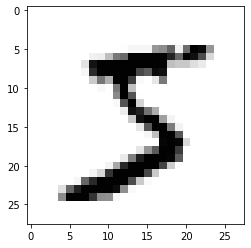

Label:  0


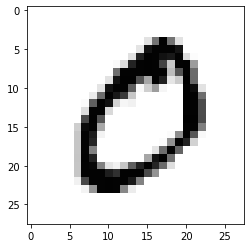

Label:  4


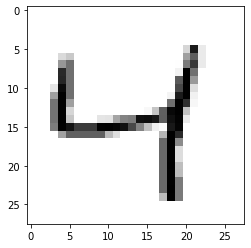

Label:  1


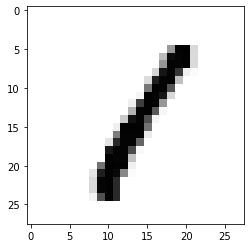

Label:  9


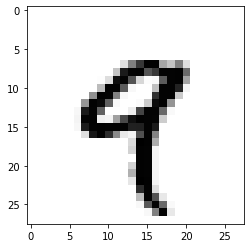

In [3]:
# Visualize a few samples
for i in range(5):
    print("Label: ", y_train[i])
    image = x_train_rowvector[i, :]
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    plt.show()
    plt.close()

# PCA Visualization
Credits: https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

In [4]:
# Calculate the covariance matrix
covariance = np.cov(x_train_rowvector_sample2000, rowvar=False)

In [5]:
# Calculate the eigenvalues and the eigenvectors for the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [6]:
# Get the real part of the eigenvalues and eigenvectors only
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

In [7]:
# Project original data onto eigenvectors
pca = np.dot(x_train_rowvector_sample2000, eigenvectors)
# Get only the first two columns for the first two principal components
pca = pca[:, 0:2]

Sort by label

In [9]:
pca_list= []
y_list = []
for i in range(10):
    pca_list.append(pca[y_train_sample2000 == i])
    y_list.append(y_train_sample2000[y_train_sample2000 == i])

Plot each label separately on graph

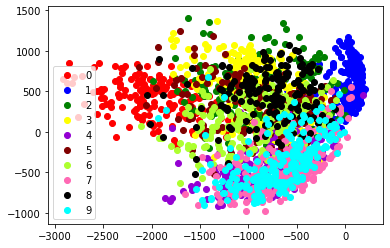

In [11]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_list[i]
    ax.scatter(pca_current_label[:, 0], pca_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()                   

# SVD Visualization